In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import pylab

In [0]:
df = pd.read_csv("/data/workspace_files/main_data.csv")
sectors = np.unique(np.array(df['Sector'])).tolist()
print(sectors)
df.head()

['Communication Services', 'Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials', 'Health Care', 'Industrials', 'Information Technology', 'Materials', 'Other', 'Real Estate', 'Utilities']


,date,5. adjusted close,6. volume,9. Ticker Sym,returns,betas,Sector,Industry Group,Industry,Sub-Industry
0,1999-11-01,6.705801,159200.0,AEM,NaN,NaN,Materials,Materials,Metals & Mining,Gold
1,1999-11-02,6.507600,126900.0,AEM,-0.029557,NaN,Materials,Materials,Metals & Mining,Gold
2,1999-11-03,6.292882,87600.0,AEM,-0.032995,NaN,Materials,Materials,Metals & Mining,Gold
3,1999-11-04,6.243332,129400.0,AEM,-0.007874,NaN,Materials,Materials,Metals & Mining,Gold
4,1999-11-05,5.987322,104000.0,AEM,-0.041005,NaN,Materials,Materials,Metals & Mining,Gold


## Hierarchical Clustering

Here, we look for clusters of correlations using the agglomerate hierarchical clustering technique. Its primary advantage over other clustering methods is that you don't need to guess in advance how many clusters there might be. Agglomerate Clustering first assigns each data point into its own cluster, and gradually merges clusters until only one remains. It's then up to the user to choose a cutoff threshold and decide how many clusters are present.

Linkage does the actual clustering in one line of code, and returns a list of the clusters joined in the format: Z=[stock_1, stock_2, distance, sample_count]

There are also different options for the measurement of the distance. The option we will choose is the ward distance measurement, but others are possible (average, single, centroid, etc.).

It's important to get a sense of how well the clustering performs. One measure is the Cophenetic Correlation Coefficient,  c . This compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer  c  is to 1, the better the clustering preserves the original distances. Generally  c  > 0.7 is consistered a good cluster fit. Of course, other accuracy checks are possible.

In [0]:
def hierarchical_clustering(df, sector):
    list_of_tickers = df[df["Sector"]==sector]["9. Ticker Sym"].unique().tolist()
    data = df[(df["date"]>"2019-01-01") & df["9. Ticker Sym"].isin(list_of_tickers)].pivot_table(index='date', 
                                        columns = "9. Ticker Sym", values = "returns", aggfunc="mean")
    data.dropna(axis='columns', inplace=True)
    corr = data.corr()
    Z = linkage(corr, 'ward')
    c, coph_dists = cophenet(Z, pdist(corr))
    plt.figure(figsize=(25, 10))
    labelsize=20
    ticksize=15
    plt.title('Hierarchical Clustering Dendrogram', fontsize=labelsize)
    plt.xlabel('stock', fontsize=labelsize)
    plt.ylabel('distance', fontsize=labelsize)
    dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
        labels = corr.columns
    )
    pylab.yticks(fontsize=ticksize)
    pylab.xticks(rotation=-90, fontsize=ticksize)
    plt.show()
    return data, c, Z

## Rolling Correlations

In [0]:
def top_pairs_from_hc(Z, data):
    top_5_pairs = []
    for i in range(5):
        s1_idx, s2_idx = int(Z[i].tolist()[0]), int(Z[i].tolist()[1])
        s1, s2 = data.columns[s1_idx], data.columns[s2_idx]
        top_5_pairs.append((s1, s2))
        print(top_5_pairs[i])
        roll_corr = data[s1].rolling(100).corr(data[s2])
        plt.plot(roll_corr)
        plt.title("Pairs: " + s1 + ", " + s2)
        plt.show()
        print("Mean :" , roll_corr.mean())
        print("Std Dev :" , roll_corr.std())
    return top_5_pairs

### Sector - Communications

0.7964468883138422
('FB', 'GOOG')
Mean : 0.664161898727022
Std Dev : 0.12438080276969381
('DIS', 'TMUS')
Mean : 0.33726253088174996
Std Dev : 0.2034901044486743
('SNAP', 'Z')
Mean : 0.3509204665074145
Std Dev : 0.19284404019049986


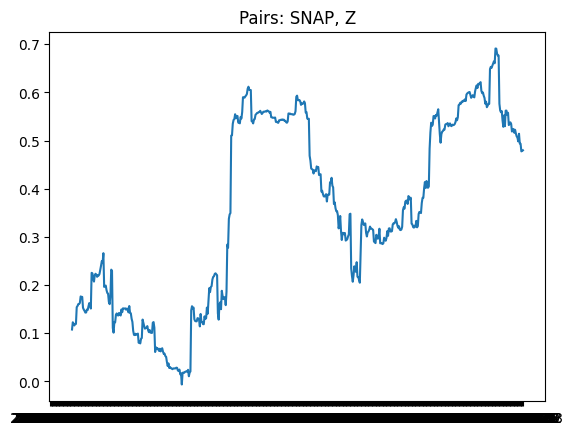

In [0]:
data, c, Z = hierarchical_clustering(df, sectors[0])
print(c)
top_5_pairs_comm = []
for i in range(3):
    s1_idx, s2_idx = int(Z[i].tolist()[0]), int(Z[i].tolist()[1])
    s1, s2 = data.columns[s1_idx], data.columns[s2_idx]
    top_5_pairs_comm.append((s1, s2))
    print(top_5_pairs_comm[i])
    roll_corr = data[s1].rolling(100).corr(data[s2])
    plt.plot(roll_corr)
    plt.title("Pairs: " + s1 + ", " + s2)
    plt.show()
    print("Mean :" , roll_corr.mean())
    print("Std Dev :" , roll_corr.std())

### Consumer Discretionary

0.8322414210324728
('KBH', 'TOL')
Mean : 0.7971030960535069
Std Dev : 0.12050692756756007
('DHI', 'LEN')
Mean : 0.8535485173366619
Std Dev : 0.08931339623062053


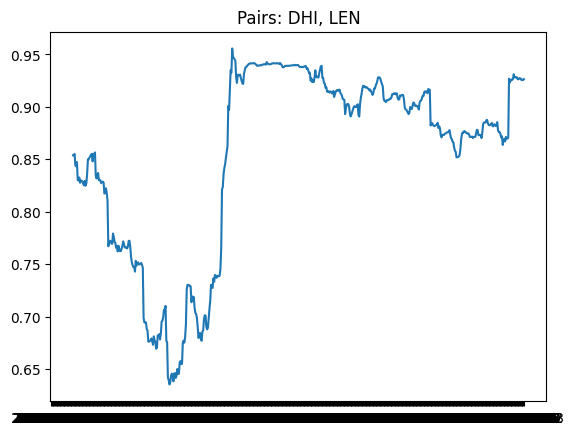

In [0]:
data, c, Z = hierarchical_clustering(df, sectors[1])
print(c)
top_5_pairs_cons_disc = []
for i in range(2):
    s1_idx, s2_idx = int(Z[i].tolist()[0]), int(Z[i].tolist()[1])
    s1, s2 = data.columns[s1_idx], data.columns[s2_idx]
    top_5_pairs_cons_disc.append((s1, s2))
    print(top_5_pairs_cons_disc[i])
    roll_corr = data[s1].rolling(100).corr(data[s2])
    plt.plot(roll_corr)
    plt.title("Pairs: " + s1 + ", " + s2)
    plt.show()
    print("Mean :" , roll_corr.mean())
    print("Std Dev :" , roll_corr.std())

### Consumer Staples

0.8024099011781329
('CL', 'PG')
Mean : 0.7214985089103847
Std Dev : 0.09517177842374498
('BG', 'DAR')
Mean : 0.5406849319202596
Std Dev : 0.1584106597243467
('PPC', 'SAFM')
Mean : 0.7138800217422193
Std Dev : 0.07910449739499877


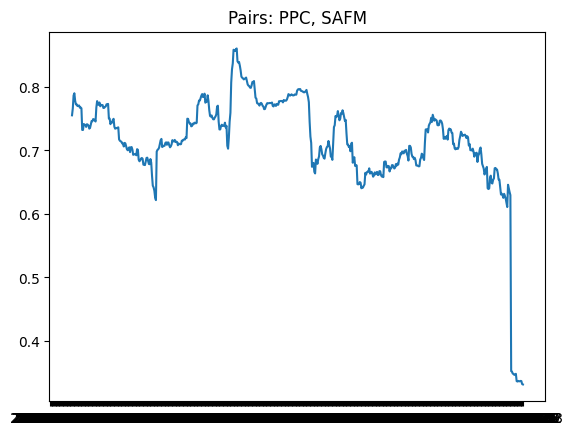

In [0]:
data, c, Z = hierarchical_clustering(df, sectors[2])
print(c)
top_5_pairs_cons_stap = []
for i in range(3):
    s1_idx, s2_idx = int(Z[i].tolist()[0]), int(Z[i].tolist()[1])
    s1, s2 = data.columns[s1_idx], data.columns[s2_idx]
    top_5_pairs_cons_stap.append((s1, s2))
    print(top_5_pairs_cons_stap[i])
    roll_corr = data[s1].rolling(100).corr(data[s2])
    plt.plot(roll_corr)
    plt.title("Pairs: " + s1 + ", " + s2)
    plt.show()
    print("Mean :" , roll_corr.mean())
    print("Std Dev :" , roll_corr.std())

### Energy

0.8245150372637988
('HAL', 'SLB')
Mean : 0.8681255320339246
Std Dev : 0.03678701951068181
('CVX', 'XOM')
Mean : 0.850967992403145
Std Dev : 0.07578586744098055


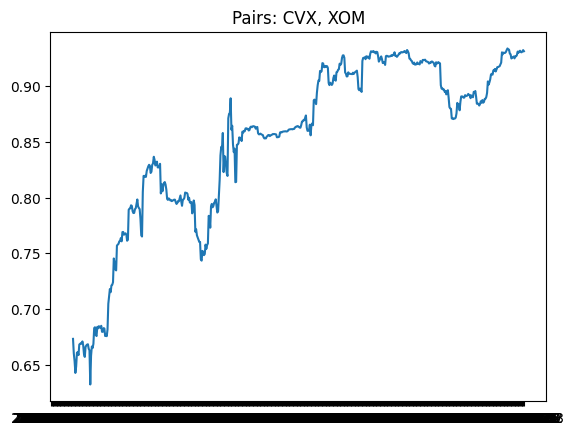

In [0]:
data, c, Z = hierarchical_clustering(df, sectors[3])
print(c)
top_5_pairs_energy = []
for i in range(2):
    s1_idx, s2_idx = int(Z[i].tolist()[0]), int(Z[i].tolist()[1])
    s1, s2 = data.columns[s1_idx], data.columns[s2_idx]
    top_5_pairs_energy.append((s1, s2))
    print(top_5_pairs_energy[i])
    roll_corr = data[s1].rolling(100).corr(data[s2])
    plt.plot(roll_corr)
    plt.title("Pairs: " + s1 + ", " + s2)
    plt.show()
    print("Mean :" , roll_corr.mean())
    print("Std Dev :" , roll_corr.std())

In [0]:
#data, c, Z = hierarchical_clustering(df, sectors[4])
#top_5_pairs_financials = top_pairs_from_hc(Z, data)

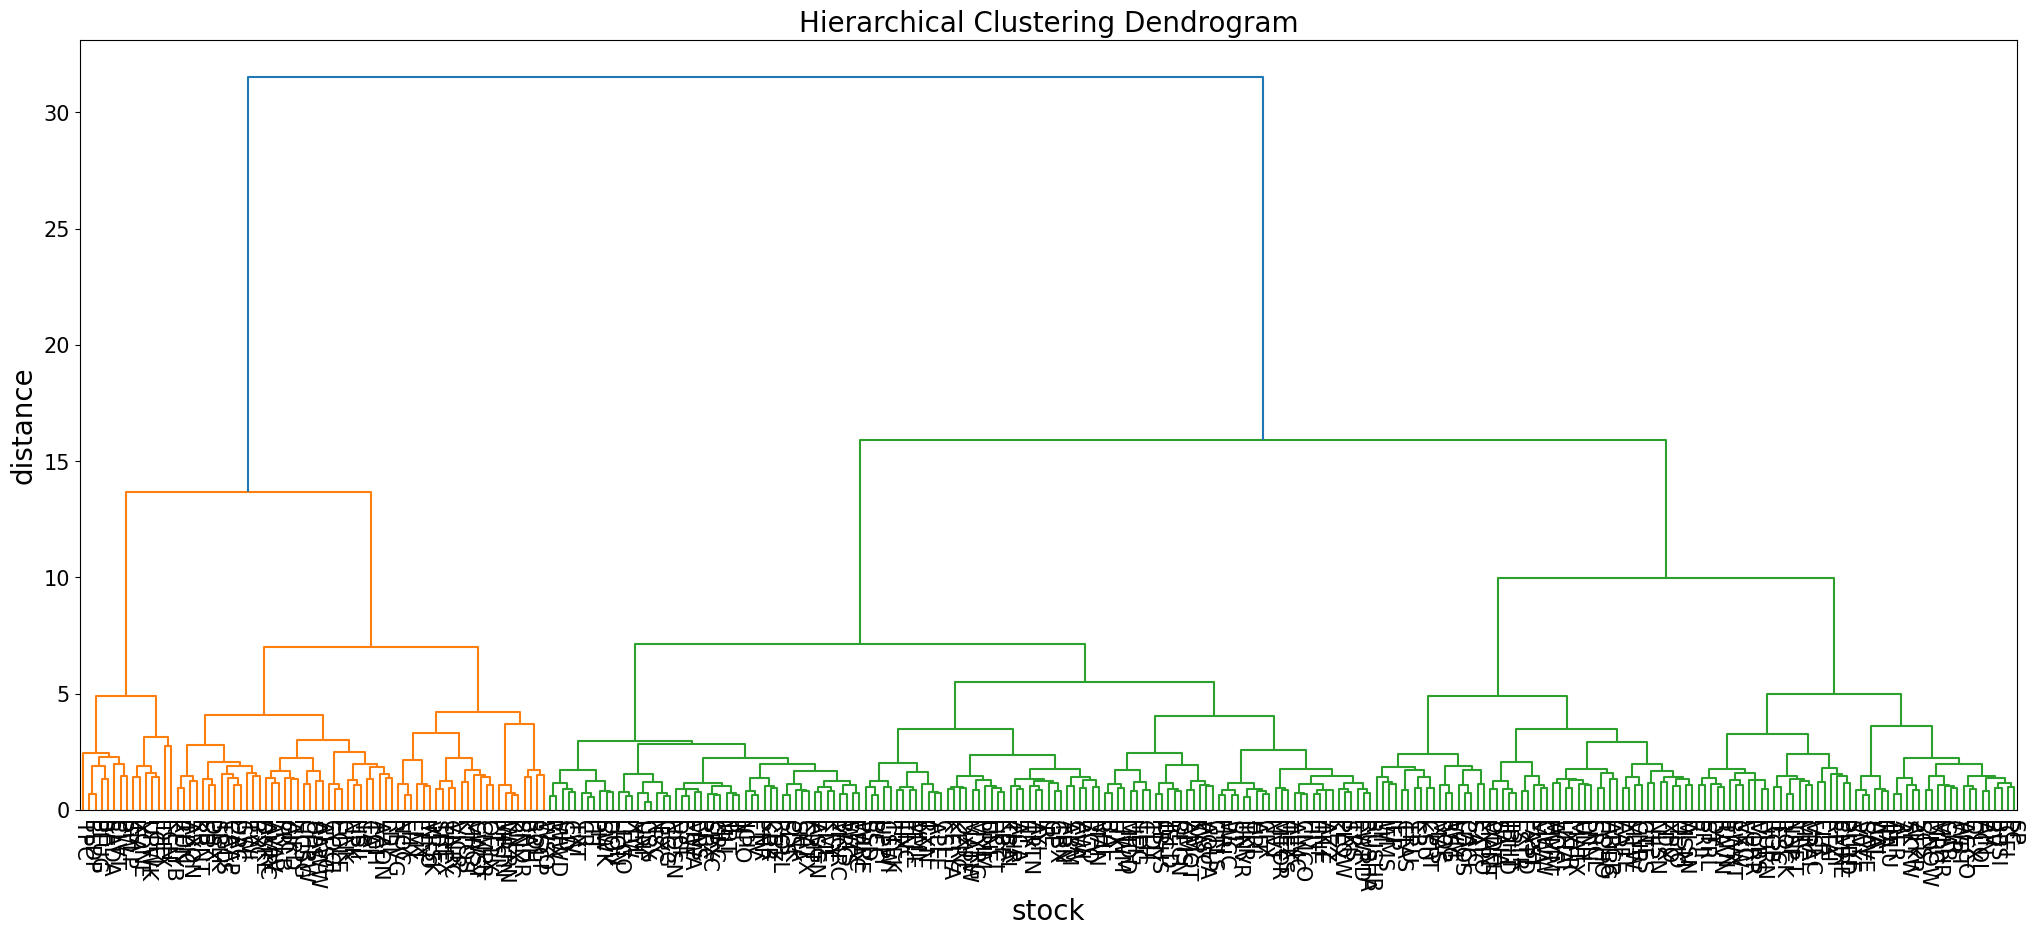

In [0]:
data, c, Z = hierarchical_clustering(df, sectors[6])

In [0]:
Z[9]
s1, s2 = data.columns[132], data.columns[295]
s2

'WCC'

In [0]:
#data, c, Z = hierarchical_clustering(df, sectors[5])
#top_5_pairs_health = top_pairs_from_hc(Z, data)

### Industrials

0.6655708751368631
('CSX', 'NSC')
Mean : 0.8478666942961394
Std Dev : 0.07035065077510462
('ITT', 'PH')
Mean : 0.8123010260437107
Std Dev : 0.05659867916477222
('TKR', 'URI')
Mean : 0.7498922053420617
Std Dev : 0.09347692898876318
('RTX', 'WWD')
Mean : 0.720859428451512
Std Dev : 0.1395571199476944
('GGG', 'NDSN')
Mean : 0.6815179135798936
Std Dev : 0.11955091392316354


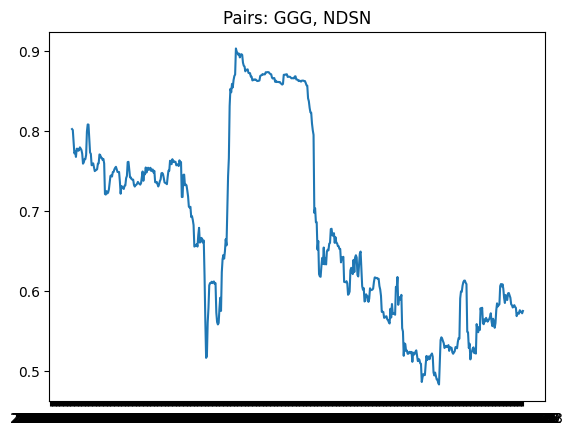

In [0]:
data, c, Z = hierarchical_clustering(df, sectors[6])
print(c)
top_5_pairs_industrials = []
for i in range(5):
    s1_idx, s2_idx = int(Z[i].tolist()[0]), int(Z[i].tolist()[1])
    s1, s2 = data.columns[s1_idx], data.columns[s2_idx]
    top_5_pairs_industrials.append((s1, s2))
    print(top_5_pairs_industrials[i])
    roll_corr = data[s1].rolling(100).corr(data[s2])
    plt.plot(roll_corr)
    plt.title("Pairs: " + s1 + ", " + s2)
    plt.show()
    print("Mean :" , roll_corr.mean())
    print("Std Dev :" , roll_corr.std())

### IT

0.6559439226711696
('LRCX', 'MKSI')
Mean : 0.8379906443105519
Std Dev : 0.05622375230864035
('ADI', 'MCHP')
Mean : 0.829824990051764
Std Dev : 0.056605037249451894
('QRVO', 'SWKS')
Mean : 0.8617514731725188
Std Dev : 0.05276781688435928


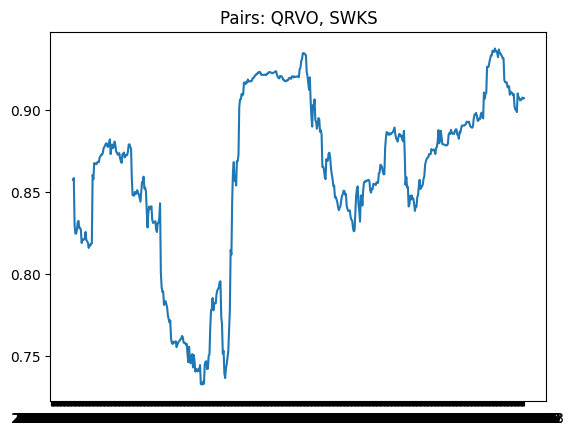

In [0]:
data, c, Z = hierarchical_clustering(df, sectors[7])
print(c)
top_5_pairs_it = []
for i in range(3):
    s1_idx, s2_idx = int(Z[i].tolist()[0]), int(Z[i].tolist()[1])
    s1, s2 = data.columns[s1_idx], data.columns[s2_idx]
    top_5_pairs_it.append((s1, s2))
    print(top_5_pairs_it[i])
    roll_corr = data[s1].rolling(100).corr(data[s2])
    plt.plot(roll_corr)
    plt.title("Pairs: " + s1 + ", " + s2)
    plt.show()
    print("Mean :" , roll_corr.mean())
    print("Std Dev :" , roll_corr.std())

### Materials

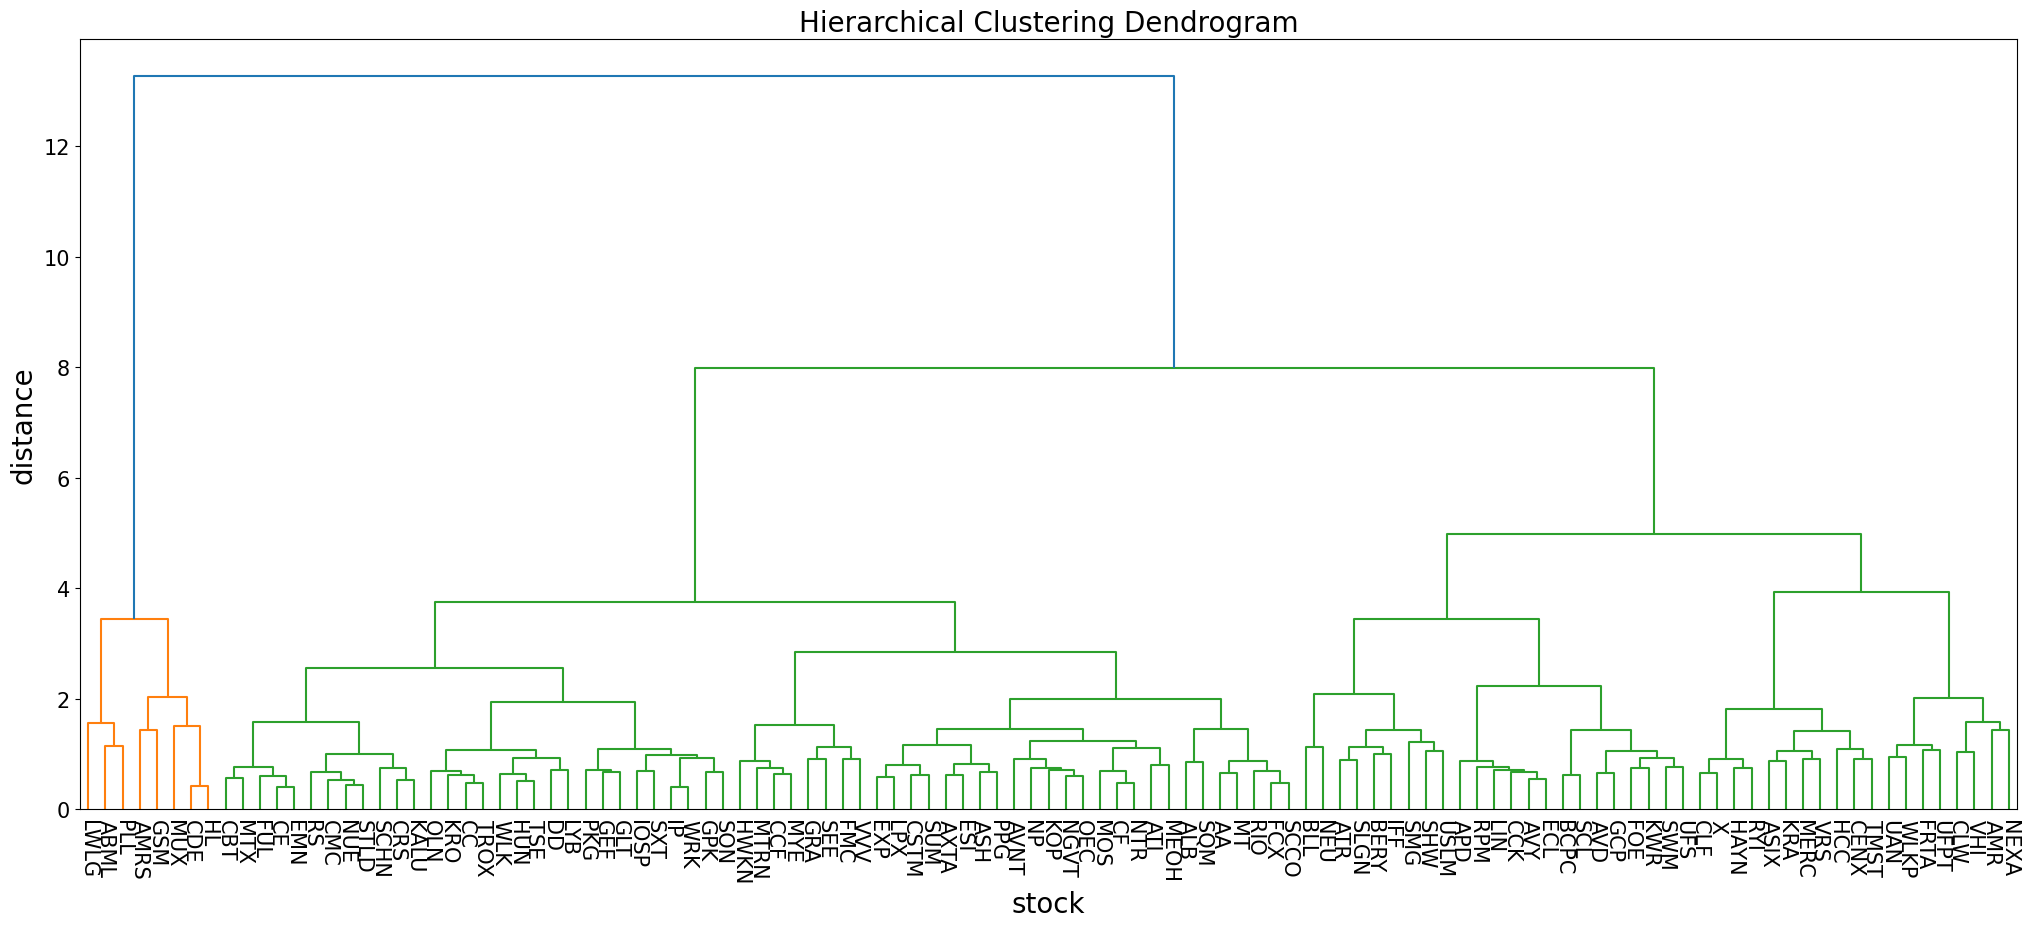

In [0]:
data, c, Z = hierarchical_clustering(df, sectors[8])
#top_5_pairs_materials = top_pairs_from_hc(Z, data)
#print(c)
Z

In [0]:
Z[9]
s1, s2 = data.columns[28], data.columns[54]
s2

'KALU'

### Other

0.7083623324583831
('IVV', 'SPY')
Mean : 0.9953756794980517
Std Dev : 0.004075382933438988
('IWF', 'VUG')
Mean : 0.9961193300623246
Std Dev : 0.002024504549411598


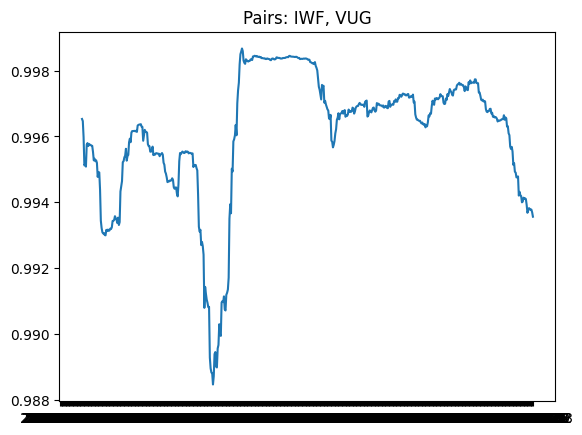

In [0]:
data, c, Z = hierarchical_clustering(df, sectors[9])
print(c)
top_5_pairs_other = []
for i in range(2):
    s1_idx, s2_idx = int(Z[i].tolist()[0]), int(Z[i].tolist()[1])
    s1, s2 = data.columns[s1_idx], data.columns[s2_idx]
    top_5_pairs_other.append((s1, s2))
    print(top_5_pairs_other[i])
    roll_corr = data[s1].rolling(100).corr(data[s2])
    plt.plot(roll_corr)
    plt.title("Pairs: " + s1 + ", " + s2)
    plt.show()
    print("Mean :" , roll_corr.mean())
    print("Std Dev :" , roll_corr.std())

### Real Estate

0.8685121106250372
('RYN', 'WY')
Mean : 0.7132347950603896
Std Dev : 0.07781570858018373


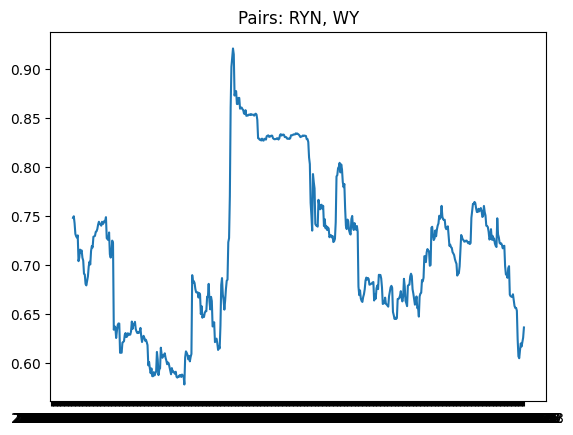

In [0]:
data, c, Z = hierarchical_clustering(df, sectors[10])
print(c)
top_5_pairs_real_estate = []
for i in range(1):
    s1_idx, s2_idx = int(Z[i].tolist()[0]), int(Z[i].tolist()[1])
    s1, s2 = data.columns[s1_idx], data.columns[s2_idx]
    top_5_pairs_real_estate.append((s1, s2))
    print(top_5_pairs_real_estate[i])
    roll_corr = data[s1].rolling(100).corr(data[s2])
    plt.plot(roll_corr)
    plt.title("Pairs: " + s1 + ", " + s2)
    plt.show()
    print("Mean :" , roll_corr.mean())
    print("Std Dev :" , roll_corr.std())

In [0]:
#data, c, Z = hierarchical_clustering(df, sectors[11])
#top_5_pairs_utilities = top_pairs_from_hc(Z, data)

In [0]:
top_pairs = top_5_pairs_comm[0:1] + top_5_pairs_cons_disc[0:2] + top_5_pairs_cons_stap[0:1] + top_5_pairs_energy[0:2] + top_5_pairs_industrials[0:4] + top_5_pairs_it + top_5_pairs_materials + top_5_pairs_other + top_5_pairs_real_estate
top_pairs

[('FB', 'GOOG'),
 ('KBH', 'TOL'),
 ('DHI', 'LEN'),
 ('CL', 'PG'),
 ('HAL', 'SLB'),
 ('CVX', 'XOM'),
 ('CSX', 'NSC'),
 ('ITT', 'PH'),
 ('TKR', 'URI'),
 ('RTX', 'WWD'),
 ('LRCX', 'MKSI'),
 ('ADI', 'MCHP'),
 ('QRVO', 'SWKS'),
 ('IP', 'WRK'),
 ('CE', 'EMN'),
 ('CDE', 'HL'),
 ('NUE', 'STLD'),
 ('CC', 'TROX'),
 ('IVV', 'SPY'),
 ('IWF', 'VUG'),
 ('RYN', 'WY')]